**Data Cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/100000 Sales Records.csv')

In [3]:
df=pd.DataFrame(dataset)

In [4]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33581,Asia,Mongolia,Household,Online,L,2/26/2011,481691539,3/21/2011,2085,668.27,502.54,1393342.95,1047795.90,345547.05
33582,Asia,Laos,Fruits,Online,H,12/16/2016,193211591,2/4/2017,4458,9.33,6.92,41593.14,30849.36,10743.78
33583,Europe,Macedonia,Cereal,Offline,H,9/6/2012,137600600,10/24/2012,7930,205.70,117.11,1631201.00,928682.30,702518.70
33584,Europe,Albania,Snacks,Online,L,7/10/2013,747719895,7/29/2013,5788,152.58,97.44,883133.04,563982.72,319150.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33586 entries, 0 to 33585
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          33586 non-null  object 
 1   Country         33586 non-null  object 
 2   Item Type       33586 non-null  object 
 3   Sales Channel   33586 non-null  object 
 4   Order Priority  33586 non-null  object 
 5   Order Date      33586 non-null  object 
 6   Order ID        33586 non-null  int64  
 7   Ship Date       33586 non-null  object 
 8   Units Sold      33586 non-null  int64  
 9   Unit Price      33586 non-null  float64
 10  Unit Cost       33586 non-null  float64
 11  Total Revenue   33586 non-null  float64
 12  Total Cost      33585 non-null  float64
 13  Total Profit    33585 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 3.6+ MB


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Feature Engineering**

In [7]:
# Shipping Time
df["Shipping Time (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

# Profit Margin
df["Profit Margin (%)"] = (df["Total Profit"] / df["Total Revenue"]) * 100

# استخراج السنة والشهر
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month

# تحويل الشهر إلى فصل
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["Order Season"] = df["Order Month"].apply(get_season)



In [8]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping Time (Days),Profit Margin (%),Order Year,Order Month,Order Season
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76,15,36.138419,2014,10,Autumn
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37,5,39.768984,2015,2,Winter
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26,40,25.830654,2015,12,Winter
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08,25,30.661936,2014,9,Autumn
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34,29,24.799856,2010,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33581,Asia,Mongolia,Household,Online,L,2011-02-26,481691539,2011-03-21,2085,668.27,502.54,1393342.95,1047795.90,345547.05,23,24.799856,2011,2,Winter
33582,Asia,Laos,Fruits,Online,H,2016-12-16,193211591,2017-02-04,4458,9.33,6.92,41593.14,30849.36,10743.78,50,25.830654,2016,12,Winter
33583,Europe,Macedonia,Cereal,Offline,H,2012-09-06,137600600,2012-10-24,7930,205.70,117.11,1631201.00,928682.30,702518.70,48,43.067574,2012,9,Autumn
33584,Europe,Albania,Snacks,Online,L,2013-07-10,747719895,2013-07-29,5788,152.58,97.44,883133.04,563982.72,319150.32,19,36.138419,2013,7,Summer


In [9]:
print(df.nunique())

Region                      7
Country                   185
Item Type                  12
Sales Channel               2
Order Priority              4
Order Date               2766
Order ID                33586
Ship Date                2808
Units Sold               9667
Unit Price                 12
Unit Cost                  12
Total Revenue           29381
Total Cost              29373
Total Profit            29370
Shipping Time (Days)       51
Profit Margin (%)          34
Order Year                  8
Order Month                12
Order Season                4
dtype: int64


In [10]:
#check if there is any duplicated values
df.duplicated().any()

np.False_

In [11]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping Time (Days),Profit Margin (%),Order Year,Order Month,Order Season
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,2014-10-08,535113847,2014-10-23,934,152.58,97.44,142509.72,91008.96,51500.76,15,36.138419,2014,10,Autumn
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2015-02-22,874708545,2015-02-27,4551,437.20,263.33,1989697.20,1198414.83,791282.37,5,39.768984,2015,2,Winter
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,2015-12-09,854349935,2016-01-18,9986,9.33,6.92,93169.38,69103.12,24066.26,40,25.830654,2015,12,Winter
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,2014-09-17,892836844,2014-10-12,9118,81.73,56.67,745214.14,516717.06,228497.08,25,30.661936,2014,9,Autumn
4,Central America and the Caribbean,Belize,Household,Offline,H,2010-02-04,129280602,2010-03-05,5858,668.27,502.54,3914725.66,2943879.32,970846.34,29,24.799856,2010,2,Winter


In [12]:
numeric_df = df.select_dtypes(include=['number'])

negative_values = print((numeric_df < 0).any().any())

False


In [13]:
# Calculate IQR for numeric columns
Q1 = numeric_df.quantile(0.25) #25%
Q3 = numeric_df.quantile(0.75) #75%

#the normal data is the difference between Q1 and Q2
IQR = Q3 - Q1

# Identify outliers for numeric columns as outlier is a value higher or lower than 1.5*IQR
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Check if there are outliers and print the result
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum()) #shows each column have how many outlier values
else:
    print("No outliers detected in the dataset.")

Outliers detected in the following columns:
Order ID                   0
Units Sold                 0
Unit Price                 0
Unit Cost                  0
Total Revenue           2191
Total Cost              3268
Total Profit            1351
Shipping Time (Days)       0
Profit Margin (%)       2806
Order Year                 0
Order Month                0
dtype: int64


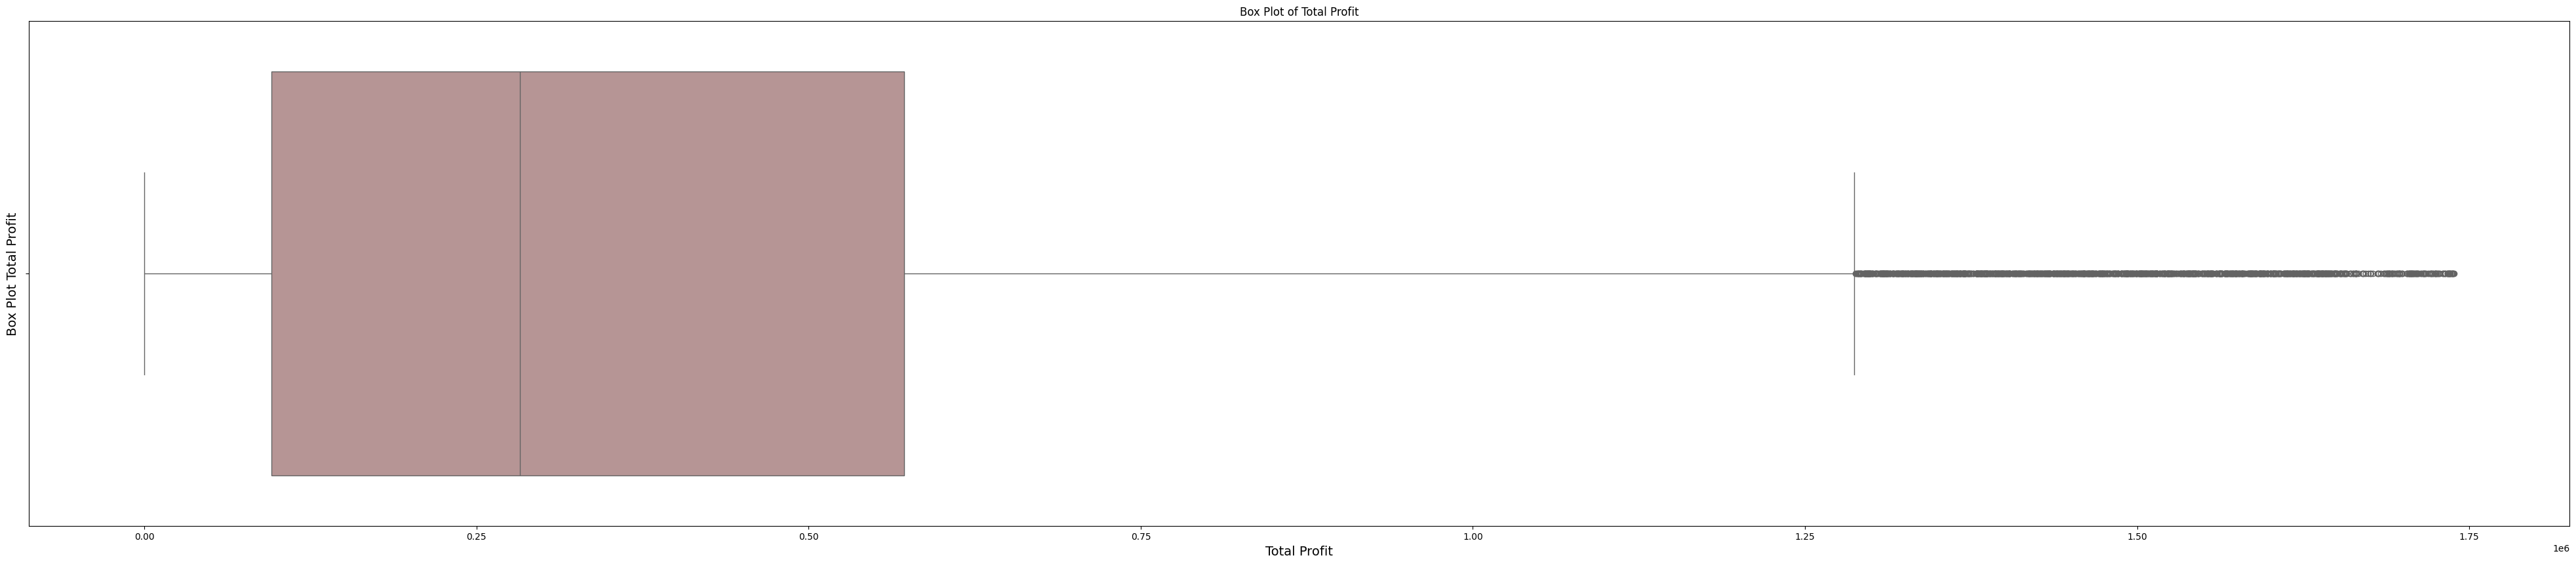

In [14]:
plt.figure(figsize=(50, 10))
sns.boxplot(x='Total Profit', data=df,color='rosybrown')
plt.title('Box Plot of Total Profit')
plt.xlabel('Total Profit',fontsize=14)
plt.ylabel('Box Plot Total Profit', fontsize=14)
plt.show()

In [15]:
##part1
Total_Profit_outliers =df[(outliers['Total Profit'] == True)]
print("'Outliers in 'Total Profit ' : ")
print(Total_Profit_outliers[['Total Profit']])
print('___________________________________________________________')


'Outliers in 'Total Profit ' : 
       Total Profit
6        1384700.68
28       1296722.46
67       1628292.55
80       1350533.77
91       1730180.37
...             ...
33520    1356831.51
33527    1495381.79
33549    1437044.83
33556    1322028.21
33578    1519909.83

[1351 rows x 1 columns]
___________________________________________________________


In [16]:
df_no_outliers = df.copy()

columns_to_clean = ['Total Revenue', 'Total Cost', 'Total Profit','Profit Margin (%)']

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

df_no_outliers.to_csv("No_Outliers_dataset.csv", index=False)

print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_no_outliers.shape)

Original dataset size: (33586, 19)
Cleaned dataset size: (26797, 19)


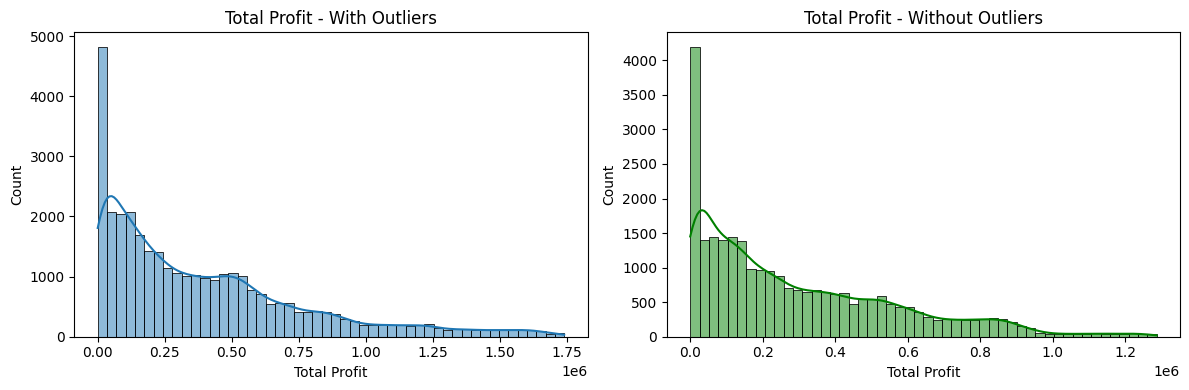

In [17]:
# Data + Outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Total Profit'], kde=True, bins=50)
plt.title('Total Profit - With Outliers')

# Data - Outliers
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['Total Profit'], kde=True, bins=50, color='green')
plt.title('Total Profit - Without Outliers')
plt.tight_layout()
plt.show()


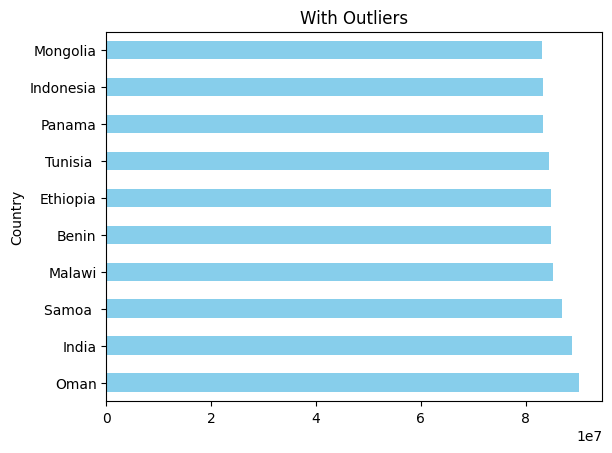

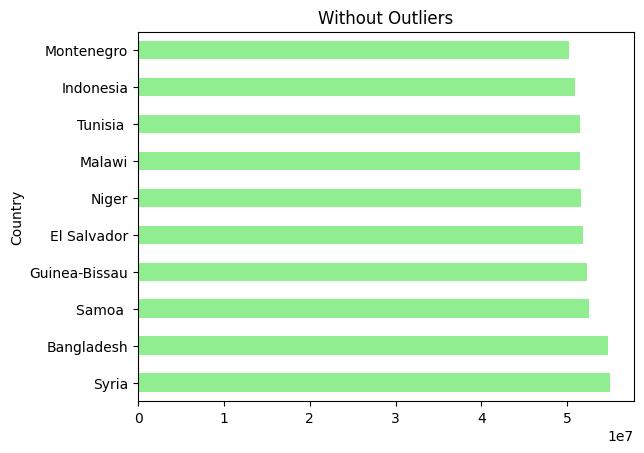

In [18]:
top_countries_1 = df.groupby("Country")["Total Profit"].sum().nlargest(10)
top_countries_2 = df_no_outliers.groupby("Country")["Total Profit"].sum().nlargest(10)

top_countries_1.plot(kind='barh', title='With Outliers', color='skyblue')
plt.show()

top_countries_2.plot(kind='barh', title='Without Outliers', color='lightgreen')
plt.show()


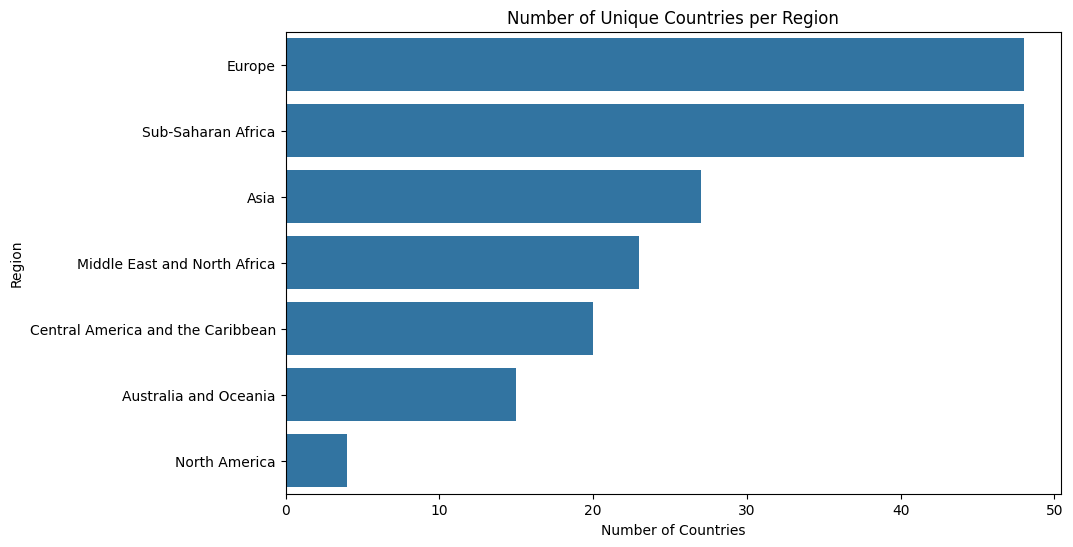

In [19]:
#سؤال 1: "أكتر Region فيها Countries بيطلبوا كتي
region_country_counts = df.groupby('Region')['Country'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=region_country_counts.values, y=region_country_counts.index)
plt.title("Number of Unique Countries per Region")
plt.xlabel("Number of Countries")
plt.ylabel("Region")
plt.show()


In [20]:
df.groupby("Region")["Shipping Time (Days)"].mean().sort_values(ascending=False)

,Shipping Time (Days)
Region,
Asia,25.183769
Australia and Oceania,25.032032
Middle East and North Africa,25.025617
Sub-Saharan Africa,25.022852
North America,24.919067
Central America and the Caribbean,24.876066
Europe,24.762549


In [21]:
df.sort_values("Shipping Time (Days)", ascending=False)[["Region", "Country", "Shipping Time (Days)"]].head(20)


,Region,Country,Shipping Time (Days)
19668,North America,United States of America,50
19671,Australia and Oceania,Kiribati,50
28463,Europe,Slovakia,50
28462,Middle East and North Africa,Libya,50
33,Europe,Switzerland,50
28460,Asia,Kazakhstan,50
22965,Europe,Lithuania,50
22969,Sub-Saharan Africa,Mozambique,50
2717,Middle East and North Africa,Israel,50
2718,Sub-Saharan Africa,Burundi,50


In [22]:
df.groupby("Country")["Shipping Time (Days)"].mean().sort_values(ascending=False)

,Shipping Time (Days)
Country,
Finland,27.302083
Nepal,26.940217
Tuvalu,26.923077
Mali,26.781065
Azerbaijan,26.751445
...,...
Egypt,23.128492
Kiribati,23.102273
Madagascar,22.760234


In [24]:
total_revenue =print(df['Total Revenue'].sum())
total_revenue_no_outliers =print(df_no_outliers['Total Revenue'].sum())

44912130253.92
24976136167.140003


In [25]:
total_profit = print(df['Total Profit'].sum())
total_profit_no_outliers = print(df_no_outliers['Total Profit'].sum())

13258985378.57
7897614105.59


In [26]:
total_units_sold = print(df['Units Sold'].sum())
total_units_sold_no_outliers =print(df_no_outliers['Units Sold'].sum())

167810878
121731013


In [27]:
avg_profit_per_unit = print(df['Total Profit'].sum() / df['Units Sold'].sum())
avg_profit_per_unit_no_outliers =print(df_no_outliers['Total Profit'].sum() / df_no_outliers['Units Sold'].sum())

79.01147730464767
64.87758469232487


In [28]:
avg_order_value =print(df['Total Revenue'].sum() / df.shape[0])
avg_order_value_no_outliers =print(df_no_outliers['Total Revenue'].sum() / df_no_outliers.shape[0])

1337227.7214887154
932049.7132940256


In [29]:
num_orders = print(df.shape[0])
num_orders_no_outliers =print(df_no_outliers.shape[0])

33586
26797


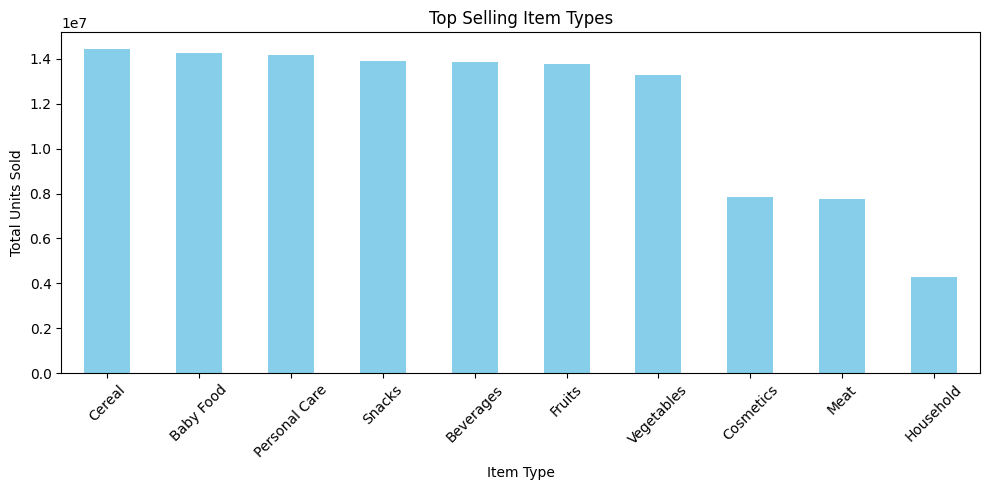

In [30]:
top_items = df_no_outliers.groupby("Item Type")["Units Sold"].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', title='Top Selling Item Types', ylabel='Total Units Sold', xlabel='Item Type', figsize=(10,5), color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

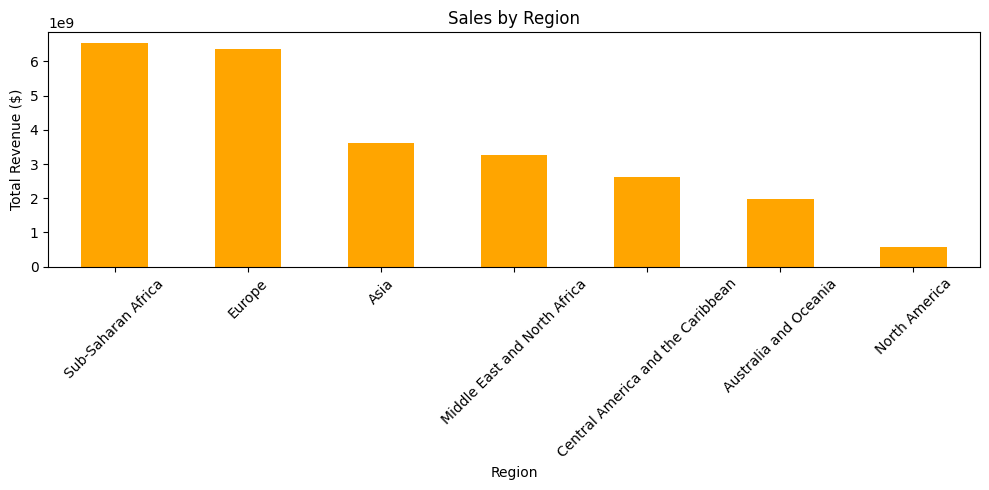

In [31]:
region_sales = df_no_outliers.groupby("Region")["Total Revenue"].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Sales by Region', ylabel='Total Revenue ($)', xlabel='Region', figsize=(10,5), color='orange')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

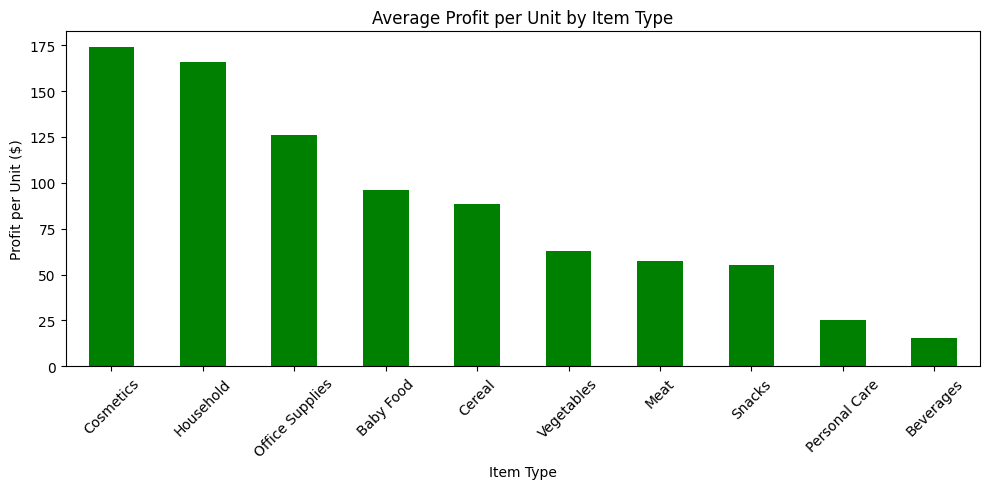

In [35]:
df_no_outliers["Profit per Unit"] = df_no_outliers["Total Profit"] / df_no_outliers["Units Sold"]
avg_profit = df_no_outliers.groupby("Item Type")["Profit per Unit"].mean().sort_values(ascending=False).head(10)
avg_profit.plot(kind='bar', title='Average Profit per Unit by Item Type', ylabel='Profit per Unit ($)', xlabel='Item Type', figsize=(10,5), color='green')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Total revenue by sales channel
channel_perf_no_out = df_no_outliers.groupby("Sales Channel")["Total Revenue"].sum().reset_index()

print("\nWithout outliers:")
print(channel_perf_no_out)



Without outliers:
  Sales Channel  Total Revenue
0       Offline   1.258870e+10
1        Online   1.238744e+10


In [37]:
df["Sales Channel"].value_counts()

,count
Sales Channel,
Offline,16971
Online,16615


In [38]:
df.groupby("Sales Channel")["Total Profit"].sum()

,Total Profit
Sales Channel,
Offline,6.714425e+09
Online,6.544560e+09


In [40]:
# Monthly trend of total revenue + outliers
monthly_sales_out = df.groupby(["Order Year", "Order Month"])["Total Revenue"].sum().reset_index()

print(monthly_sales_out.head())


   Order Year  Order Month  Total Revenue
0        2010            1   5.691521e+08
1        2010            2   4.987973e+08
2        2010            3   5.010979e+08
3        2010            4   4.690795e+08
4        2010            5   4.675473e+08


In [43]:
# Average shipping time by sales channel +no out
shipping_delay_no_out = df_no_outliers.groupby("Sales Channel")["Shipping Time (Days)"].mean().reset_index()

print(shipping_delay_no_out)


  Sales Channel  Shipping Time (Days)
0       Offline             24.933535
1        Online             24.889383


In [44]:
top5_countries_profit_out = df.groupby("Country")["Total Profit"].sum().sort_values(ascending=False).head(5)
top5_countries_profit_out

,Total Profit
Country,
Oman,90125254.37
India,88869752.90
Samoa,86904767.47
Malawi,85287723.17
Benin,84832706.18


In [45]:
top5_countries_profit_no_out = df_no_outliers.groupby("Country")["Total Profit"].sum().sort_values(ascending=False).head(5)
top5_countries_profit_no_out

,Total Profit
Country,
Syria,55019726.99
Bangladesh,54683911.72
Samoa,52526941.60
Guinea-Bissau,52235399.89
El Salvador,51821961.67


In [48]:
# Without outliers
region_country_counts_no_outliers =print(df_no_outliers.groupby('Region')['Country'].nunique().sort_values(ascending=False))

Region
Europe                               48
Sub-Saharan Africa                   48
Asia                                 27
Middle East and North Africa         23
Central America and the Caribbean    20
Australia and Oceania                15
North America                         4
Name: Country, dtype: int64


In [49]:
top_profit_per_year = df.groupby(['Order Year', 'Item Type'])['Total Profit'].sum().reset_index()
top_profit_per_year['Rank'] = top_profit_per_year.groupby('Order Year')['Total Profit'].rank(ascending=False, method='first')
top_products = top_profit_per_year[top_profit_per_year['Rank'] == 1]
top_product_counts = top_products['Item Type'].value_counts().reset_index()
top_product_counts.columns = ['Item Type', 'Times Top']
top_product_counts.head()


,Item Type,Times Top
0,Cosmetics,5
1,Household,3


In [50]:
# إضافة سنة وشهر
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# حساب الربح الشهري لكل منتج
monthly_profit = df.groupby(['Item Type', 'Order Year', 'Order Month'])['Total Profit'].sum().reset_index()

# نحسب الفرق في الأرباح من شهر للتاني
monthly_profit['Profit Change'] = monthly_profit.groupby('Item Type')['Total Profit'].diff()

# نعرض المنتجات اللي حصل لها قفزات ضخمة في الربح
sudden_increase = monthly_profit.sort_values(by='Profit Change', ascending=False)

# نشوف أول المنتجات
sudden_increase.head(10)


,Item Type,Order Year,Order Month,Total Profit,Profit Change
451,Cosmetics,2017,4,41012629.47,23959286.00
614,Household,2015,9,31380809.77,18978239.49
402,Cosmetics,2013,3,40099116.49,18232877.55
574,Household,2012,5,36428116.92,17452860.57
742,Office Supplies,2011,3,26035527.50,17008021.25
634,Household,2017,5,35509806.99,15746835.95
590,Household,2013,9,34996209.72,15456476.99
399,Cosmetics,2012,12,28311078.23,14502496.70
437,Cosmetics,2016,2,28055837.07,14049913.09
608,Household,2015,3,34699055.83,13496885.47


In [51]:
# نبدأ نفلتر الـ Orders اللي عدد الوحدات فيها كبير جدًا
bulk_orders = df[df['Units Sold'] > df['Units Sold'].quantile(0.99)]

# نعرض أكتر الصفقات المريبة (مثلاً أعلى 10 حسب الربح)
exceptional_deals = bulk_orders.sort_values(by='Total Profit', ascending=False).head(10)

exceptional_deals[['Order Date', 'Country', 'Item Type', 'Units Sold', 'Total Revenue', 'Total Profit']]


,Order Date,Country,Item Type,Units Sold,Total Revenue,Total Profit
27108,2016-06-20,Comoros,Cosmetics,10000,4372000.0,1738700.00
20982,2015-07-23,Oman,Cosmetics,9997,4370688.4,1738178.39
2693,2012-12-11,Panama,Cosmetics,9994,4369376.8,1737656.78
18736,2012-08-19,Tonga,Cosmetics,9994,4369376.8,1737656.78
27140,2012-02-25,Bahrain,Cosmetics,9991,4368065.2,1737135.17
12517,2011-12-26,Equatorial Guinea,Cosmetics,9991,4368065.2,1737135.17
9976,2013-11-16,Chad,Cosmetics,9987,4366316.4,1736439.69
15206,2015-11-03,Austria,Cosmetics,9983,4364567.6,1735744.21
1319,2010-04-21,Qatar,Cosmetics,9982,4364130.4,1735570.34
30676,2010-06-04,Syria,Cosmetics,9982,4364130.4,1735570.34


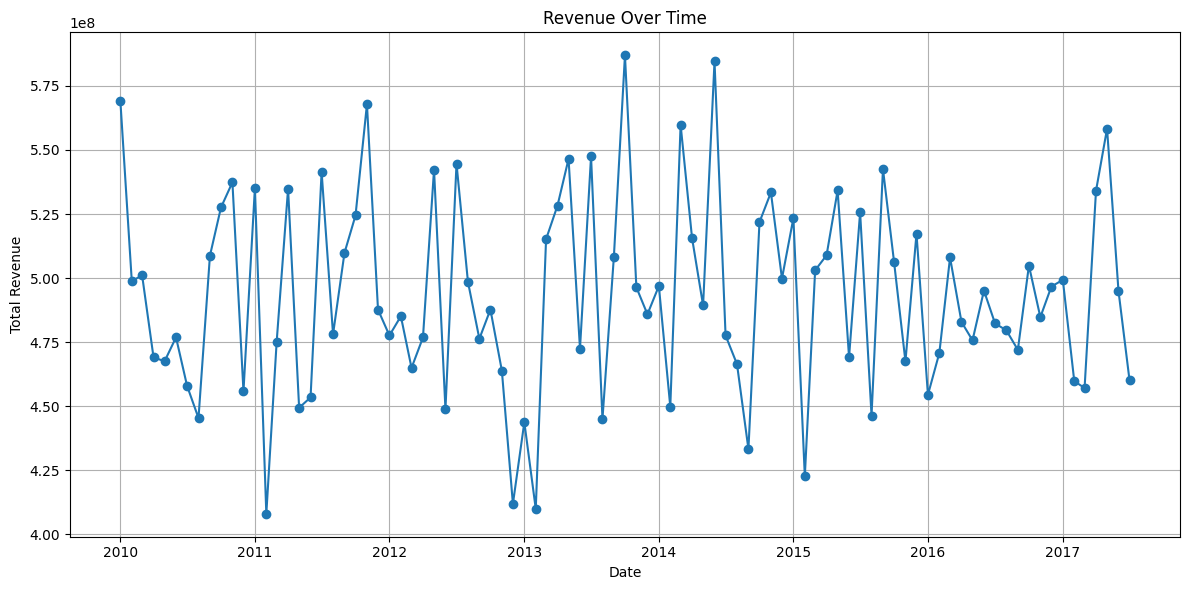

In [52]:
# نحسب الإيرادات لكل شهر
monthly_revenue = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

# نرتب الشهور علشان الـ line chart يطلع مظبوط
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue['Order Year'].astype(str) + '-' + monthly_revenue['Order Month'].astype(str) + '-01')

# نرسم الإيرادات عبر الزمن
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Total Revenue'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
# نشوف عدد الطلبات حسب Order Priority
all_priority_counts = df['Order Priority'].value_counts()
print(all_priority_counts)

Order Priority
L    8486
C    8407
H    8404
M    8289
Name: count, dtype: int64


In [62]:
# الطلبات اللي فيها أرباح أكتر من 90th percentile
threshold = df['Total Profit'].quantile(0.9)
top_profit_orders = df[df['Total Profit'] > threshold]

# نشوف Shipping Time مقابل Order Priority
top_profit_shipping = top_profit_orders[['Order Priority', 'Shipping Time (Days)']]
print(top_profit_shipping.sort_values(by='Shipping Time (Days)', ascending=True).head(10))


      Order Priority  Shipping Time (Days)
203                H                     0
33322              L                     0
652                L                     0
20717              H                     0
5035               C                     0
19593              H                     0
19758              M                     0
19757              C                     0
18990              L                     0
22547              H                     0


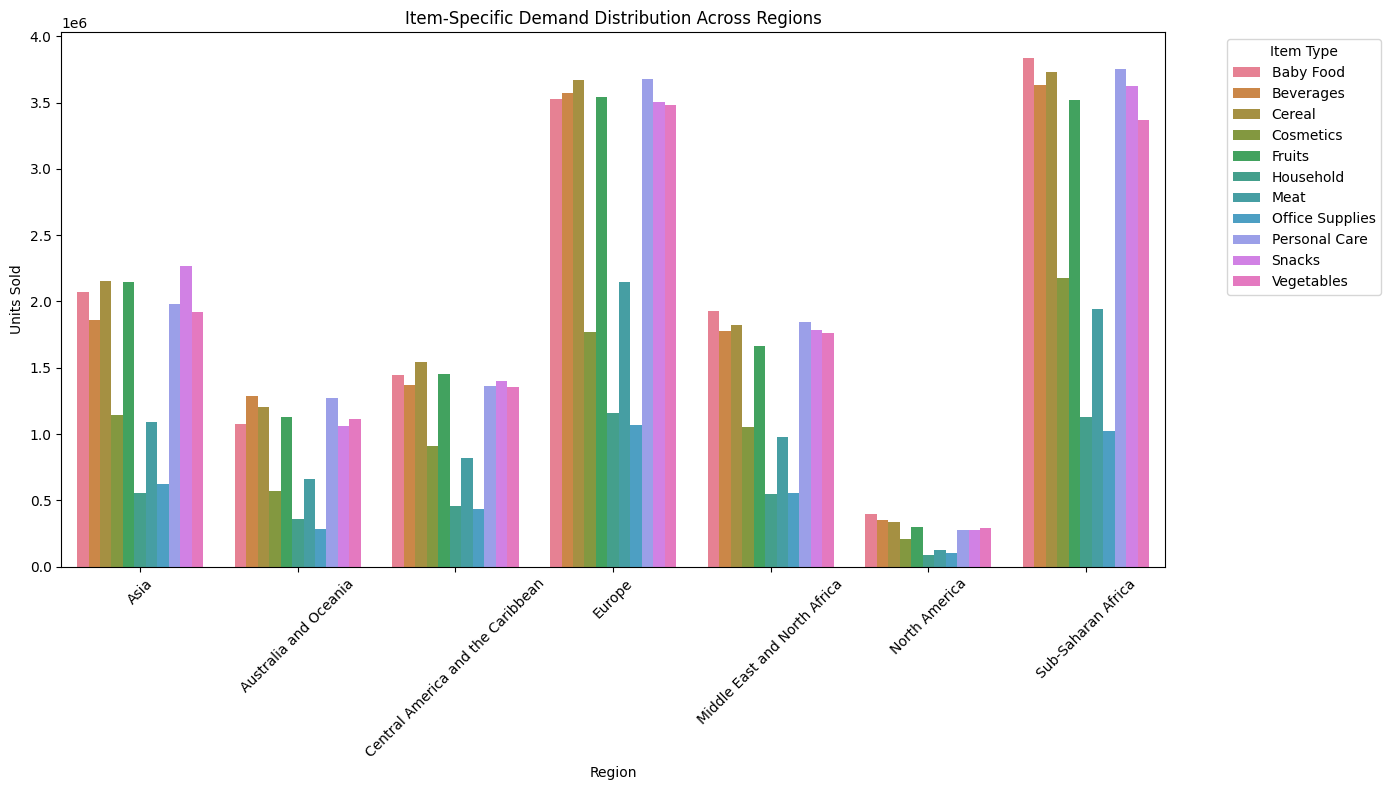

In [63]:
# Count of items sold per region and item type
item_region_demand = df_no_outliers.groupby(['Region', 'Item Type'])['Units Sold'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=item_region_demand, x='Region', y='Units Sold', hue='Item Type')
plt.title('Item-Specific Demand Distribution Across Regions')
plt.xticks(rotation=45)
plt.ylabel('Units Sold')
plt.xlabel('Region')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
